In [ ]:
""" This is a redundant file which just measures plasticity of one cluster """

In [11]:
# Environment settings
import scanpy as sc
import os
import numpy as np
import pandas as pd
import pickle
import plasticity_simlib as psl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

""""  ###### VARIABLES ########  """

main_dir = '../data/KPTracer-Data_divided/h5ad_filesWLineage/'
h5ad_data_path = main_dir + 'NEW_yang_HP_scrtrCell.h5ad'
character_matrix_path = main_dir + 'NEW_yang_HP_scrtrCell_character_matrix.pkl'

""""  ###### VARIABLES ########  """

# read the data and character matrix
adams = sc.read(h5ad_data_path)
with open(character_matrix_path, 'rb') as file:
    character_matrix = pickle.load(file)

In [12]:
# Compute the pairwise PHENOTYPIC distances between cells in the character matrix
tree_dm = pairwise_distances(character_matrix.values, metric=psl.modified_hamming_distance, force_all_finite=False)
tree_dm = pd.DataFrame(tree_dm, index=character_matrix.index, columns=character_matrix.index)
np.fill_diagonal(tree_dm.values, np.nan)    # Replace values in the diagonal with np.nan

In [13]:
# Compute the pairwise PHYLOGENETIC distances between cells
pheno_dm = pairwise_distances(adams.X, metric='euclidean')
pheno_dm = pd.DataFrame(pheno_dm, index=adams.obs_names, columns= adams.obs_names)
np.fill_diagonal(pheno_dm.values, np.nan)


In [24]:
# overlap
radii = [len(_) for _ in np.array_split(np.arange(tree_dm.shape[0]), 50)]
overlaps = psl.get_overlaps(tree_dm, pheno_dm, radii=radii)
#overlaps.to_csv(os.path.join(data_dir, 'overlaps.csv'))

# Gini Index (AT) why
gini_index = psl.get_gini_index(overlaps.iloc[:, :30])
gini_index['Plastic'] = 'Non-Plastic'
print()

  0%|          | 0/50 [00:00<?, ?it/s]

/Users/arghamitratalukder/Library/CloudStorage/GoogleDrive-at3836@columbia.edu/My Drive/technical_work/Lineage_plasticity/codes/plasticity_simlib.py:210: RuntimeWarning: invalid value encountered in divide
  cumprop = cumsum / cumsum[-1]


KeyboardInterrupt: 

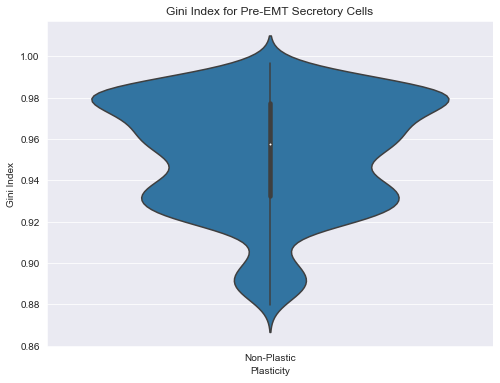

In [10]:
 #Plot a violin plot of the gini index for plastic and non-plastic cells
plt.figure(figsize=(8,6))
sns.violinplot(x='Plastic', y='Gini Index', data=gini_index)
plt.xlabel('Plasticity')
plt.ylabel('Gini Index')
plt.title('Gini Index for Pre-EMT Secretory Cells')
plt.show()
print()

In [17]:
""""  ###### VARIABLES ########  """

main_dir = '../data/KPTracer-Data_divided/h5ad_filesWLineage/'
h5ad_data_path = main_dir + 'NEW_yang_HP_scrtrCell.h5ad'
character_matrix_path = main_dir + 'yang_HP_scrtrCell_character_matrix.pkl'

""""  ###### VARIABLES ########  """

# read the data and character matrix
adams = sc.read(h5ad_data_path)
with open(character_matrix_path, 'rb') as file:
    character_matrix = pickle.load(file)
print()

In [12]:
# Compute the pairwise PHENOTYPIC distances between cells in the character matrix
tree_dm = pairwise_distances(character_matrix.values, metric=psl.modified_hamming_distance, force_all_finite=False)
tree_dm = pd.DataFrame(tree_dm, index=character_matrix.index, columns=character_matrix.index)
np.fill_diagonal(tree_dm.values, np.nan)  

In [18]:
# Compute the pairwise PHYLOGENETIC distances between cells
pheno_dm = pairwise_distances(adams.X, metric='euclidean')
pheno_dm = pd.DataFrame(pheno_dm, index=adams.obs_names, columns= adams.obs_names)
np.fill_diagonal(pheno_dm.values, np.nan)

In [36]:
# overlap
# overlaps = psl.get_overlaps(tree_dm, pheno_dm, radii=np.arange(1, len(tree_dm.columns), 10))
# print()
#overlaps = psl.get_overlaps(tree_dm, pheno_dm, radii=np.arange(1, 50, 10))
#overlaps.to_csv(os.path.join(data_dir, 'overlaps.csv'))
radii = [len(_) for _ in np.array_split(np.arange(tree_dm.shape[0]), 50)]
overlaps = psl.get_overlaps(tree_dm, pheno_dm, np.cumsum(radii))


  0%|          | 0/50 [00:00<?, ?it/s]

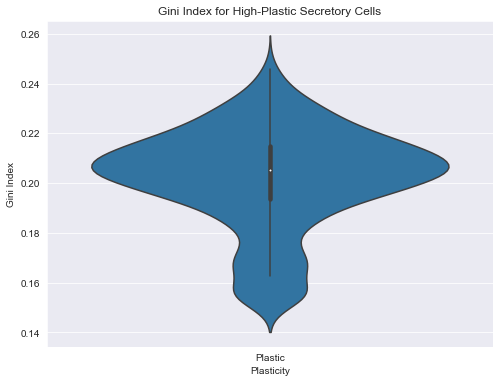

In [40]:
# Gini Index (AT) why
#gini_index = psl.get_gini_index(overlaps.iloc[:, :30])
gini_index = psl.get_gini_index(overlaps)
gini_index['Plastic'] = 'Plastic'
print()
#Plot a violin plot of the gini index for plastic and non-plastic cells
plt.figure(figsize=(8,6))
sns.violinplot(x='Plastic', y='Gini Index', data=gini_index)
plt.xlabel('Plasticity')
plt.ylabel('Gini Index')
plt.title('Gini Index for High-Plastic Secretory Cells')
plt.show()
print()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


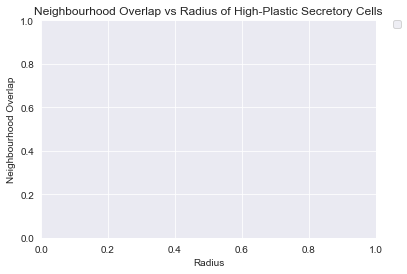

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(x='variable', y='value', data=overlaps.melt(), errorbar='sd', label='Plastic')
# sns.lineplot(x='variable', y='value', data=overlaps.melt(), errorbar='sd', label='Non-Plastic', color='grey')
plt.xlabel('Radius')
plt.ylabel('Neighbourhood Overlap')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Neighbourhood Overlap vs Radius of High-Plastic Secretory Cells')
plt.show()